<a href="https://colab.research.google.com/github/vishnupm-22/SMS_or_Email_Spam_Classifier/blob/main/Sms_email__spam__detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROBLEM** **STATEMENT** :
Develop an adaptive spam classification system using advanced machine learning techniques to tackle the significant challenges arising from unwanted emails and text messages.

#### **Steps**:


1.   Data Gathering
2.   Data understanding/Data Cleaning
3.   EDA
4.   Text Preprocessing
5.   Model Buliding
6.   Model Evaluation
7.   Model Improvement
8.   Deloyement




### **DATA GATHERING**
Opening a local csv file using pandas 'read_csv' function

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_sets/spam.csv',encoding='ISO-8859-1')

### **DATA CLEANING**
Data set contains 5000 + points with features as:
v1 : ham/spam cat column,
v2 : texts,
Others : NaN .


In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

data.info():  gives the info about the type of data and Non-Null count of features : Here the last 3 columns have very less non-null values so we can drop 3 colms using pandas drop method

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
data.sample(5)

,v1,v2
2665,ham,R u meeting da ge at nite tmr?
4606,ham,Been running but only managed 5 minutes and th...
1893,ham,Good Morning plz call me sir
1493,ham,How are you with moneY...as in to you...money ...
2271,ham,Life spend with someone for a lifetime may be ...


Renaming the columns as target and text

In [ ]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
data.sample(5)

,target,text
648,ham,No prob. I will send to your email.
1929,spam,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...
5302,ham,About &lt;#&gt; bucks. The banks fees are fix...
3583,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...
3010,ham,"Hm good morning, headache anyone? :-)"


Checking for Null values : No Null values in both columns

In [ ]:
data.isnull().sum()

target    0
text      0
dtype: int64

checking for duplicate values and dropping using drop_duplicates by keeping the first occurences

In [ ]:
data.duplicated().sum()

403

In [ ]:
data=data.drop_duplicates(subset = ['target','text'],keep='first')

checking the shape of data after removing duplicates

In [ ]:
data.shape

(5169, 2)

### **EDA**
***Univariate Analysis***

In [ ]:
import matplotlib.pyplot as plt
data['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

**Bar and Pie plot** :
Target Feature distribution : plotting Bar,pie chart shows that the distribution of data is inbalanced

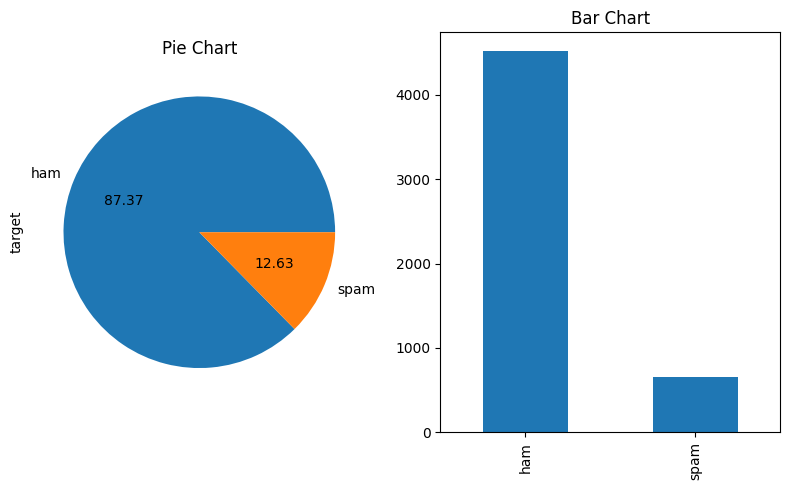

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(8,5))
data['target'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct="%0.2f",ax=axs[0])
axs[0].set_title('Pie Chart')
data['target'].value_counts().plot(kind='bar',ax=axs[1])
axs[1].set_title('Bar Chart')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Hist Plot**:
*  Exploring ham & spam message length distribution




In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['num_chars']=data['text'].apply(len)

In [ ]:
data['num_words']= data['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
data['num_sentences']= data['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
data.head()

,target,text,num_chars,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


*Describe*() gives an info about statistical measures of the data

In [ ]:
data[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


mean,25%,50%,75%,std values of spam for all 3 colums are high as compared to ham messages

In [ ]:
mask1 = data['target'] =='ham'
data_ham= data[mask1]
data_ham[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
mask2 = data['target'] =='spam'
data_spam= data[mask2]
data_spam[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


*Spam messages are mainly distributed right on 100 while Ham messages are distributed left on the length of 100.
Thus, we can conclude as spam message tends to have more letters than ham message.*

<Axes: xlabel='num_chars', ylabel='Count'>

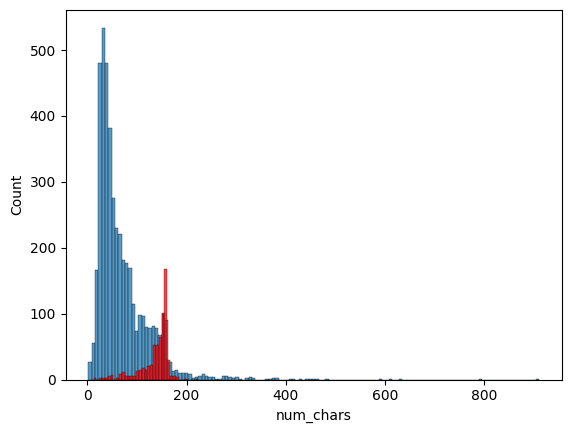

In [ ]:
import seaborn as sns
sns.histplot(data_ham['num_chars'])
sns.histplot(data_spam['num_chars'],color='red')

Spam messages are mainly distributed right on 50 while Ham messages are distributed left on the length of 50. Thus, we can conclude as spam message tends to have more words than ham message.

<Axes: xlabel='num_words', ylabel='Count'>

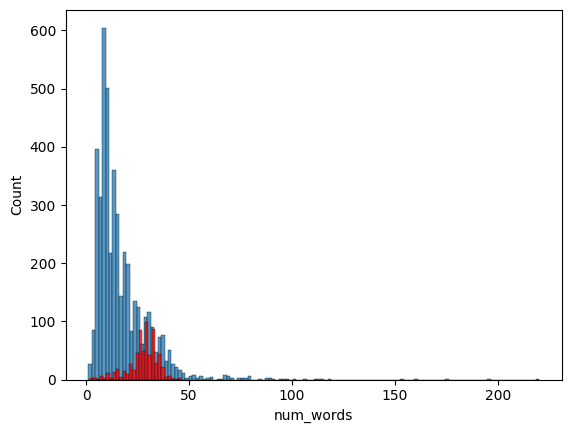

In [ ]:
sns.histplot(data_ham['num_words'])
sns.histplot(data_spam['num_words'],color='red')

**Bivariate Analysis**:

***Pair Plot*** : Explores relationship between the columns.
from scatterplot we can conclude that there is linear relationship between the num-words and num_characters and data contains few outliers

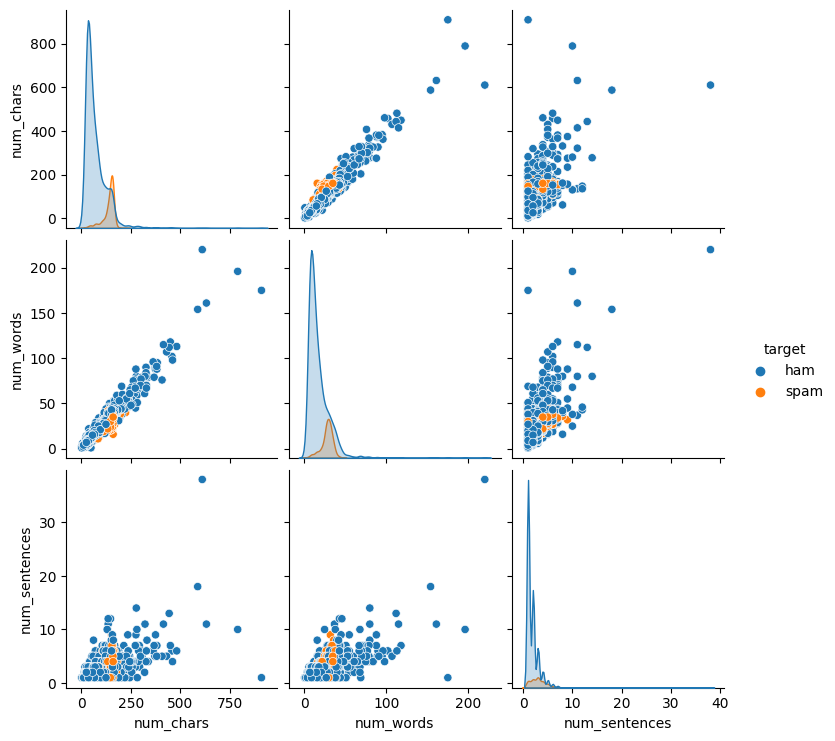

In [ ]:
sns.pairplot(data,hue='target')

***Heat Map*** : used to visualize the correlation between different variables in a dataset. Here the target & num_char colms,num_sentences & num_words are Highly positively correlated



Label Encoding : Encoding the target column between 0 and 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['target']=l.fit_transform(data['target'])
data.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data.corr()

<ipython-input-30-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-31-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

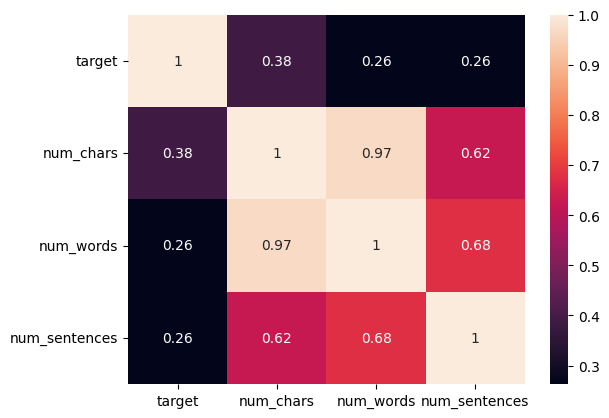

In [ ]:
sns.heatmap(data.corr(),annot=True)

### **DATA** **PREPROCESSING**


**LOWER CASING** :

*   lowercasing ensures that the same word in different cases is treated as a single token.
*   it helps in simplifying the text and reduces the complexity of the feature space as it reduces the number of unique words.

**TOKENIZATION** :

*  helps in segmenting text into meaningful elements, making it more manageable for analysis and processing.
*  helps in Feature Extraction.
*  here by making use of NLTK library ,tokenizing the text to words.

**REMOVING SPECIAL CHARACTERS**:

*  Special characters, such as punctuation marks and symbols, can introduce noise in text data. Removing them helps clean and simplify the text, making it easier to analyze and process.

**REMOVING STOP WORDS**
*  do not carry significant meaning.

**STEMMING**:
* different inflected forms of a word can be mapped to a common root, making text analysis and information retrieval more efficient.
* reduced by making use of porter stemmer algo of NLP







In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem.porter import PorterStemmer
s = PorterStemmer()
s.stem('playing')

'play'

Tranforming the whole text by calling function transform_text

In [ ]:

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:   # alpha numeroc .
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(s.stem(i))

  return " ".join(y)

In [ ]:
data['transformed_text'] = data['text'].apply(lambda x : transform_text(x))

In [ ]:
data.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**WORD CLOUD** : Word clouds are often used in data visualization to provide a quick and visually appealing way to highlight the most important words in a text corpus.
used word cloud to highlight  the most imp words in both spam and ham messages

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size=10,background_color='white')

wc.generate() is used to generate a word cloud from the concatenated spam text data.

In [ ]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

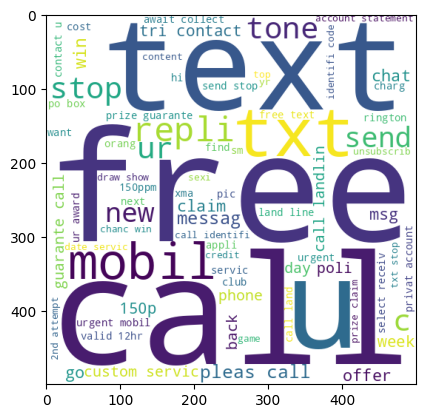

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

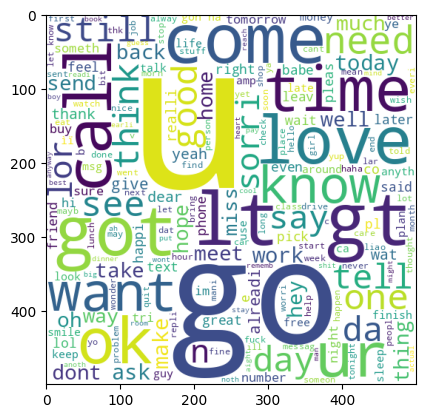

In [ ]:
plt.imshow(ham_wc)

Visualizing the most common words of both ham and spam in bar plot

In [ ]:
data[data['target']==0]['transformed_text'].tolist()

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [ ]:
spam = []
for msg in data[data['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam.append(word)

In [ ]:
from collections import Counter
Counter(spam).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
spam_commonwords = pd.DataFrame(Counter(spam).most_common(30),columns=['word', 'count'])
spam_commonwords

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


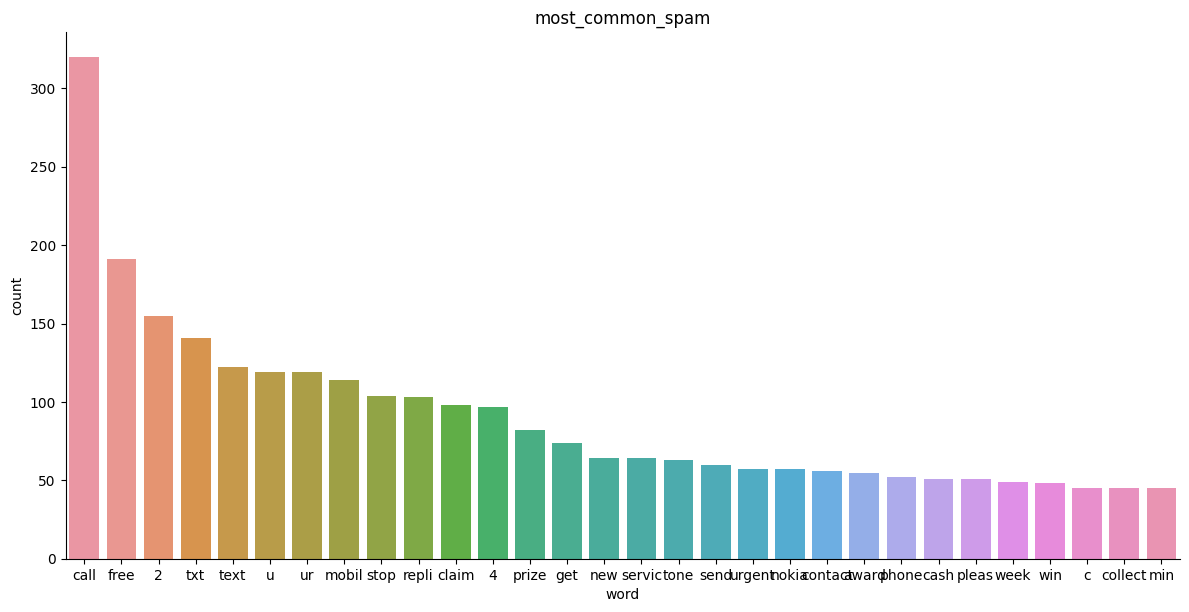

In [ ]:
sns.catplot(x='word', y='count', data=spam_commonwords, kind='bar', height=6, aspect=2)
plt.title("most_common_spam")
plt.show()

In [ ]:
ham = []
for msg in data[data['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham.append(word)

In [ ]:
from collections import Counter
Counter(ham).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [ ]:
ham_commonwords = pd.DataFrame(Counter(ham).most_common(30),columns=['word', 'count'])

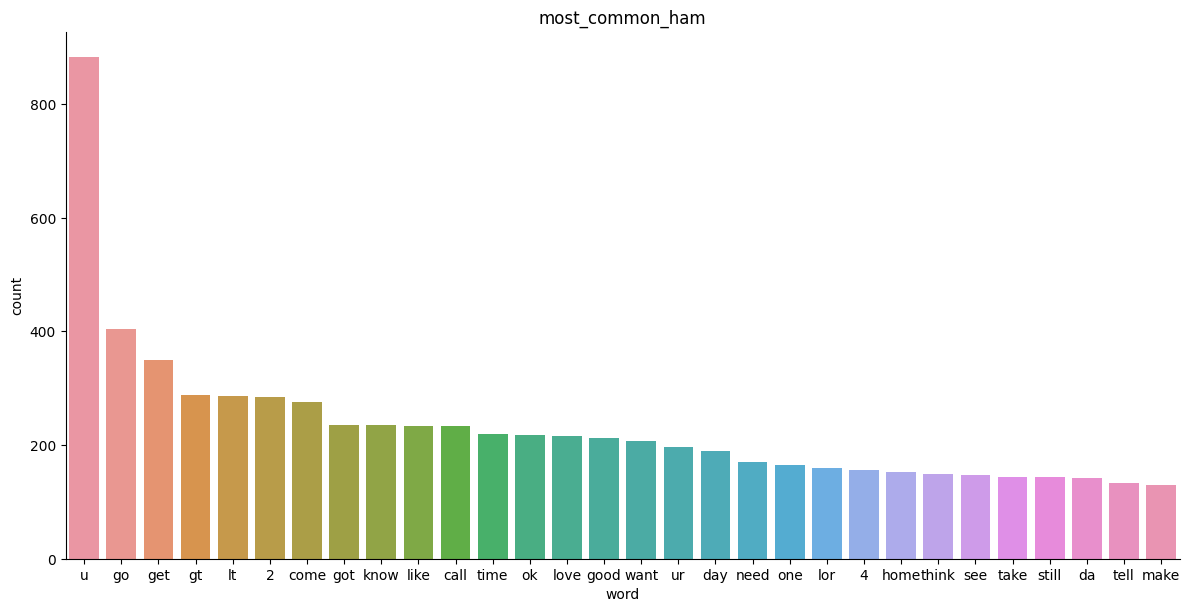

In [ ]:
sns.catplot(x='word', y='count', data=ham_commonwords, kind='bar', height=6, aspect=2)
plt.title("most_common_ham")
plt.show()

**Under-Sampling technique**

In [ ]:
mask1 = data['target'] ==1
data_spam= data[mask1]
data_spam.shape

(653, 6)

In [ ]:
mask1 = data['target'] ==0
data_ham= data[mask1]

In [ ]:
data_ham = data_ham.sample(n = 653)
data_ham.shape

(653, 6)

In [ ]:
new_dataset = pd.concat([data_ham,data_spam],axis=0)

In [ ]:
new_dataset.sample(2)

,target,text,num_chars,num_words,num_sentences,transformed_text
1006,1,Panasonic & BluetoothHdset FREE. Nokia FREE. M...,150,25,4,panason bluetoothhdset free nokia free motorol...
1293,0,Happy birthday... May all ur dreams come true...,48,10,1,happi birthday may ur dream come true


**FEATURE EXTRACTION** || **TEXT VECTORIZATION**

1. Bag of Words (BoW): It represents text as a set of unique words (vocabulary) and counts the frequency of each word in the document. Each document is represented as a vector with dimensions equal to the vocabulary size.
Count Vectorizer:  method for creating a Bag of Words (BoW) representation of text data.

2. Term Frequency-Inverse Document Frequency (TF-IDF):method that considers the importance of words in a document relative to their frequency across a corpus. It assigns higher weights to terms that are frequent within a document but rare in the entire corpus.

* TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)
* IDF(t) = log_e(Total number of documents / Number of documents containing term t)
* TF-IDF(t, d) = TF(t, d) * IDF(t)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(new_dataset['transformed_text']).toarray()

In [ ]:
# X = cv.fit_transform(data['transformed_text']).toarray()

In [ ]:
y = new_dataset['target'].values

In [ ]:
X.shape

(1306, 3000)

In [ ]:
y.shape

(1306,)

**MODEL BUILDING** **AND EVALUATION**

naive Bayes : Algorithm is a family of probabilistic algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of a feature.
* P(c|x) = P(x|c) * P(c) / P(x)
* p(x|c) = p(x1|c)*p(x2|c)...
* laplace smoothing : to ensure non zero probabilities
      * P(x|c) = count(x in c) + 1/(count(x)+ Vocab_size)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9274809160305344
[[121   9]
 [ 10 122]]
0.9312977099236641


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9274809160305344
[[121   9]
 [ 10 122]]
0.9312977099236641


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9465648854961832
[[130   0]
 [ 14 118]]
1.0


**MODEL IMPROVEMENTS:**
 * used both feature extraction techniques and seen that tfidf performes better than countvectorizer
 * with tfidf method, bnb performes well with precision of 1.0 as compared to other models


**MODEL DEPLOYEMENT**
* Deployed the model in a streamlit app.

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))